<h1> Reto - Entrega 2

<h2>Johan Andrés Castro Gomez - Matricula A01793556

<h2>Mateo Cruz Lanchero - Matricula A01793882

<h3>Librerías

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix


<h3>Selección de variables

In [152]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-Equipo_16/main/Reto/Entrega%201/Datos/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df_sub =  pd.read_csv(path, encoding= 'latin-1')
df_sub

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [153]:
df_sub.drop(columns=['SDT_mg/L','CONTAMINANTES'], inplace= True)
df_sub.dropna(inplace=True)
df_sub.replace({'<': ''}, regex=True, inplace = True)

df_columns = df_sub.columns

for col in df_columns:
    try:
        df_sub[col] = df_sub[col].astype('float')
    except:
        df_sub[col] = df_sub[col].astype('str')

df_sub.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                 float64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_CR               object
HG_TOT_m

Se eliminan las primeras 7 Columnas y las columnas que empiezan con calidad

In [154]:
[x for x in df_sub.columns if x.startswith('CALIDAD')]

['CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO',
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE']

In [155]:
'''df_sub.drop([
 'CLAVE', 
 'SITIO', 
 'ORGANISMO_DE_CUENCA', 
 'ESTADO', 
 'MUNICIPIO',
 'ACUIFERO', 
 'SUBTIPO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO',
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE'], axis=1, inplace=True)'''

"df_sub.drop([\n 'CLAVE', \n 'SITIO', \n 'ORGANISMO_DE_CUENCA', \n 'ESTADO', \n 'MUNICIPIO',\n 'ACUIFERO', \n 'SUBTIPO',\n 'CALIDAD_ALC',\n 'CALIDAD_CONDUC',\n 'CALIDAD_SDT_ra',\n 'CALIDAD_SDT_salin',\n 'CALIDAD_FLUO',\n 'CALIDAD_DUR',\n 'CALIDAD_COLI_FEC',\n 'CALIDAD_N_NO3',\n 'CALIDAD_AS',\n 'CALIDAD_CD',\n 'CALIDAD_CR',\n 'CALIDAD_HG',\n 'CALIDAD_PB',\n 'CALIDAD_MN',\n 'CALIDAD_FE'], axis=1, inplace=True)"

In [156]:
df_sub.drop([
 'CLAVE', 
 'SITIO', 
 'ORGANISMO_DE_CUENCA', 
 'ESTADO', 
 'MUNICIPIO',
 'ACUIFERO', 
 'SUBTIPO'], axis=1, inplace=True)

Train - Test split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(df_sub.drop('SEMAFORO', axis=1), df_sub[['SEMAFORO']], test_size= 0.2)

Pipelines

In [158]:
#Variables Categoricas
categorical_pipeline = Pipeline(steps=[('encoder', preprocessing.OrdinalEncoder())])
categorical_columns =  list(X_train.columns[X_train.dtypes == 'object'])

#Variables numericas
numerical_pipeline = Pipeline(steps=[('num_transformation',preprocessing.PowerTransformer(method='yeo-johnson', standardize = True))])
numerical_columns = list(X_train.columns[X_train.dtypes == 'float64'])

#Transformers X
x_col_transformer = ColumnTransformer(
                                        transformers = [('categorical_t',categorical_pipeline, categorical_columns),
                                                        ('numerical_t', numerical_pipeline, numerical_columns)],
                                        remainder='passthrough'
                                     )

#Transformer y
y_col_transformer = ColumnTransformer(
                                        transformers = [('categorical_t',categorical_pipeline, ['SEMAFORO'])],
                                        remainder='passthrough'
                                     )

X_fit = x_col_transformer.fit(X_train)
y_fit = y_col_transformer.fit(y_train)

X_train_t = X_fit.transform(X_train)
X_test_t = X_fit.transform(X_test)

y_train_t = y_fit.transform(y_train)
y_test_t = y_fit.transform(y_test)

c:\Users\PSC6806\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Modelo

In [159]:
model_name = []
models = []

#Perceptrón multicapa
model_name.append('Decision Tree')
models.append(DecisionTreeClassifier())

# Random forest
model_name.append('Random forest')
models.append(RandomForestClassifier())

In [160]:
rf = RandomForestClassifier()
rf.fit(X_train_t, y_train_t)
 
y_hat= rf.predict(X_test_t)

C:\Users\PSC6806\AppData\Local\Temp\ipykernel_6820\1916587190.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_t, y_train_t)


<AxesSubplot:>

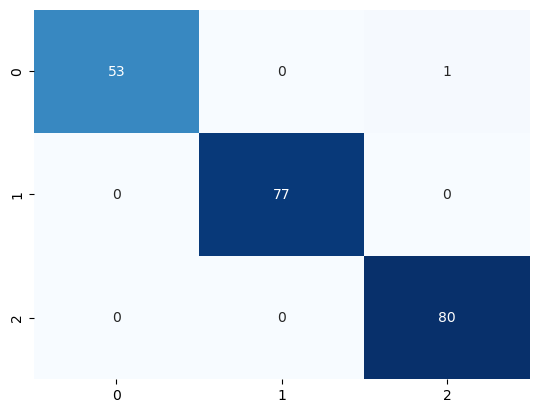

In [161]:
cm = confusion_matrix(y_test_t, y_hat)
sns.heatmap(cm, annot=True, cmap='Blues',cbar=False)


In [167]:
categorical_columns + numerical_columns

['CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO',
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE',
 'LONGITUD',
 'LATITUD',
 'PERIODO',
 'ALC_mg/L',
 'CONDUCT_mS/cm',
 'SDT_M_mg/L',
 'FLUORUROS_mg/L',
 'DUR_mg/L',
 'COLI_FEC_NMP/100_mL',
 'N_NO3_mg/L',
 'AS_TOT_mg/L',
 'CD_TOT_mg/L',
 'CR_TOT_mg/L',
 'HG_TOT_mg/L',
 'PB_TOT_mg/L',
 'MN_TOT_mg/L',
 'FE_TOT_mg/L']

C:\Users\PSC6806\AppData\Local\Temp\ipykernel_6820\1004873824.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train_t, y_train_t)


Elapsed time to compute the importances: 2.773 seconds


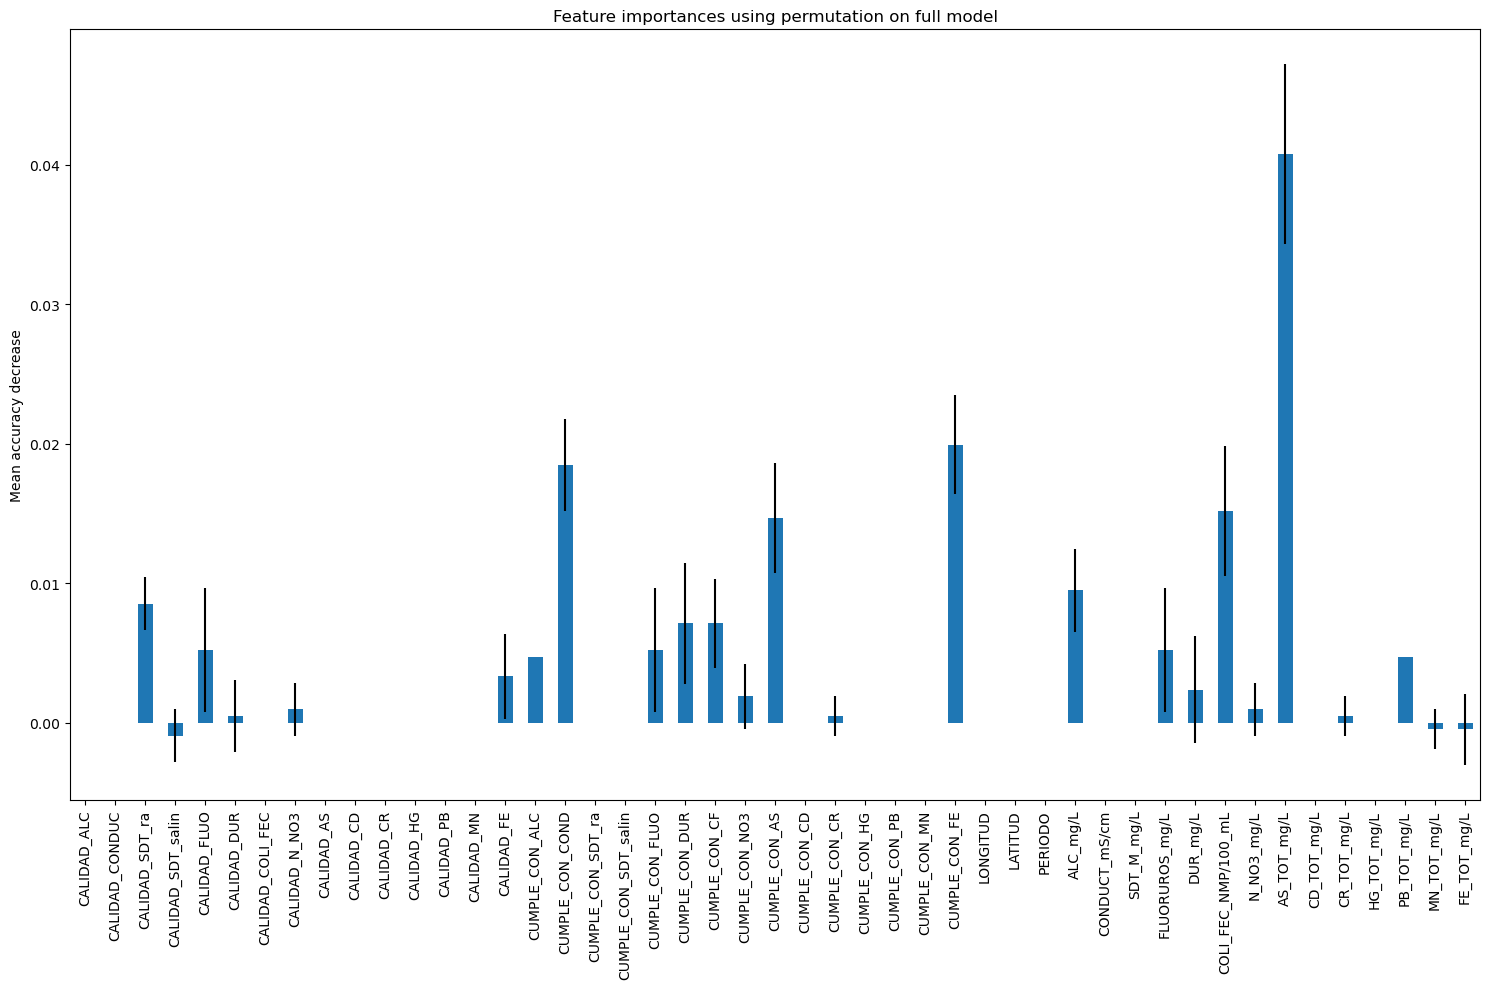

In [173]:
from sklearn.inspection import permutation_importance
import time

feature_names = categorical_columns + numerical_columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_t, y_train_t)

start_time = time.time()
result = permutation_importance(
    forest, X_test_t, y_test_t, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots(figsize = (15,10))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [180]:
forest_importances[forest_importances != 0].sort_values(ascending=False)

AS_TOT_mg/L            0.040758
CUMPLE_CON_FE          0.019905
CUMPLE_CON_COND        0.018483
COLI_FEC_NMP/100_mL    0.015166
CUMPLE_CON_AS          0.014692
ALC_mg/L               0.009479
CALIDAD_SDT_ra         0.008531
CUMPLE_CON_DUR         0.007109
CUMPLE_CON_CF          0.007109
FLUORUROS_mg/L         0.005213
CUMPLE_CON_FLUO        0.005213
CALIDAD_FLUO           0.005213
PB_TOT_mg/L            0.004739
CUMPLE_CON_ALC         0.004739
CALIDAD_FE             0.003318
DUR_mg/L               0.002370
CUMPLE_CON_NO3         0.001896
CALIDAD_N_NO3          0.000948
N_NO3_mg/L             0.000948
CUMPLE_CON_CR          0.000474
CR_TOT_mg/L            0.000474
CALIDAD_DUR            0.000474
MN_TOT_mg/L           -0.000474
FE_TOT_mg/L           -0.000474
CALIDAD_SDT_salin     -0.000948
dtype: float64

In [182]:
final_fetures = forest_importances[forest_importances != 0].index
final_fetures

Index(['CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_FLUO', 'CALIDAD_DUR',
       'CALIDAD_N_NO3', 'CALIDAD_FE', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND',
       'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3',
       'CUMPLE_CON_AS', 'CUMPLE_CON_CR', 'CUMPLE_CON_FE', 'ALC_mg/L',
       'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L',
       'AS_TOT_mg/L', 'CR_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')

Modelo final